<center>&copy; | Ghassen <strong>MARRAKCHI</strong> - 2022</center>

<img src="__src/LIPN.png" style="" width="300">
<hr>

<h1 style="text-align:center;color:#5a84ba"><center>Benchmarking Clustering DataStream</center></h1>
<h2><center><strong><font color='#3f4a4f'>Datasets Exploratory</font></strong></center></h2>

<hr>
<h3><center><strong><font color='#3f4a4f'>II- Exploration</font></strong></center></h3>
<hr>

<h4><strong><font color='#353b38'>Plan de Travail</font></strong></h4>

<ol style="list-style-type: upper-roman;">
    <li><a href="III- Analysis.ipynb">Introduction</a></li>
    <li><strong>Exploration</strong></li>
    <li><a href="III- Analysis.ipynb">Analysis</a></li>
    <li><a href="IV- Optimisation.ipynb">Optimisation</a></li>
</ol>

<hr>
<h4><strong><font color='#353b38'>Objectifs</font></strong></h4>

- Analyser les jeux de données.

<hr>
<h4 id="SOMMAIRE"><strong><font color='#353b38'>Jeux de données</font></strong></h4>

<ul>
    <li><a href="#INSECTS_abrupt_balanced_norm"><strong>INSECTS_abrupt_balanced_norm</strong></a></li>
    <li><a href="#INSECTS_abrupt_imbalanced_norm"><strong>INSECTS_abrupt_imbalanced_norm</strong></a></li>
    <li><a href="#INSECTS_gradual_balanced_norm"><strong>INSECTS_gradual_balanced_norm</strong></a></li>
    <li><a href="#INSECTS_gradual_imbalanced_norm"><strong>INSECTS_gradual_imbalanced_norm</strong></a></li>
    <li><a href="#INSECTS_incremental_abrupt_balanced_norm"><strong>INSECTS_incremental_abrupt_balanced_norm</strong></a></li>
    <li><a href="#INSECTS_incremental_abrupt_imbalanced_norm"><strong>INSECTS_incremental_abrupt_imbalanced_norm</strong></a></li>
    <li><a href="#INSECTS_incremental_balanced_norm"><strong>INSECTS_incremental_balanced_norm</strong></a></li>
    <li><a href="#INSECTS_incremental_imbalanced_norm"><strong>INSECTS_incremental_imbalanced_norm</strong></a></li>
    <li><a href="#INSECTS_incremental_reoccurring_balanced_norm"><strong>INSECTS_incremental_reoccurring_balanced_norm</strong></a></li>
    <li><a href="#INSECTS_incremental_reoccurring_imbalanced_norm"><strong>INSECTS_incremental_reoccurring_imbalanced_norm</strong></a></li>
    <li><a href="#INSECTS_out_of_control_norm"><strong>INSECTS_out_of_control_norm</strong></a></li>
</ul>

<h4><strong><font color='#353b38'>Configuration générale du notebook</font></strong></h4>

In [1]:
# Importation des paquets
import os
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.io import arff
from tqdm import tqdm
from sklearn import preprocessing

In [2]:
# Jeux de données
DATASETS = dict()
DATASETS_DIR = os.path.abspath(os.path.join("..", "Datasets"))

DATASETS_BRUTES_DIR = os.path.abspath(os.path.join("..", "Datasets", "brute"))
DATASETS_PRE_PROCESS_DIR = os.path.abspath(os.path.join("..", "Datasets", "pre-processed"))

EXPLORATORY_DIR = os.path.abspath(os.path.join("..", "Exploratory"))
RESULTS_DIR = os.path.abspath(os.path.join("..", "Results"))

In [3]:
# Jeux de données (Papier scientifique)
paper_datasets_dir_string = "Classification DataStream Benchmark"

PAPER_DATASETS_BRUTES_DIR = os.path.join(DATASETS_BRUTES_DIR, paper_datasets_dir_string)
PAPER_DATASETS_PRE_PROCESS_DIR = os.path.join(DATASETS_PRE_PROCESS_DIR, paper_datasets_dir_string)

PAPER_EXPLORATORY_DIR = os.path.join(EXPLORATORY_DIR, paper_datasets_dir_string)

PAPER_RESULTS_DIR = os.path.join(RESULTS_DIR, paper_datasets_dir_string)



## Récupération des fichiers BRUTES
files = [file for file in os.listdir(PAPER_DATASETS_BRUTES_DIR)
         if (os.path.isfile(os.path.join(PAPER_DATASETS_BRUTES_DIR, file)) and (".arff" in file) ) ]
print("--- Nombre de fichiers : ", len(files))



## Enregistrement des informations
for file in tqdm(files) :
    # Nom du dataset
    DATASETS[file.replace(".arff", "")] = dict()
    DATASETS[file.replace(".arff", "")]['name'] = file.replace(".arff", "")
    
    
    # Emplacements relatifs au dataset
    DATASETS[file.replace(".arff", "")]['brute-dir'] = PAPER_DATASETS_BRUTES_DIR
    DATASETS[file.replace(".arff", "")]['pre-proc-dir'] = PAPER_DATASETS_PRE_PROCESS_DIR
    DATASETS[file.replace(".arff", "")]['exploratory-dir'] = PAPER_EXPLORATORY_DIR
    
    reduction_path = os.path.join(PAPER_RESULTS_DIR, file.replace(".arff", ""), 'Reduction')
    if not os.path.exists(reduction_path) :
        os.makedirs(reduction_path)
    
    evaluation_path = os.path.join(PAPER_RESULTS_DIR, file.replace(".arff", ""), 'Evaluation')
    if not os.path.exists(evaluation_path) :
        os.makedirs(evaluation_path)
        
    DATASETS[file.replace(".arff", "")]['results-dir'] = {'reduction-dir' : reduction_path,
                                                          'evaluation-dir': evaluation_path}
    


## Vérification du processus
assert len(files) == len(list(DATASETS.keys()))
print(len(list(DATASETS.keys())), " ont été enregistré avec succès !")

--- Nombre de fichiers :  11


100%|██████████| 11/11 [00:00<00:00, 21917.98it/s]

11  ont été enregistré avec succès !


In [4]:
# Récupération des jeux de données restants


## Récupération des fichiers
files = [file for file in os.listdir(DATASETS_BRUTES_DIR)
         if (os.path.isfile(os.path.join(DATASETS_BRUTES_DIR, file)) and (".arff" in file) ) ]
print("--- Nombre de fichiers : ", len(files))



## Enregistrement des informations
restant_dataset = dict()

for file in tqdm(files) :
    # Nom du dataset
    restant_dataset[file.replace(".arff", "")] = dict()
    restant_dataset[file.replace(".arff", "")]['name'] = file.replace(".arff", "")
    
    # Emplacements relatifs au dataset
    restant_dataset[file.replace(".arff", "")]['brute-dir'] = DATASETS_BRUTES_DIR
    restant_dataset[file.replace(".arff", "")]['pre-proc-dir'] = DATASETS_PRE_PROCESS_DIR
    restant_dataset[file.replace(".arff", "")]['exploratory-dir'] = EXPLORATORY_DIR
    
    reduction_path = os.path.join(RESULTS_DIR, file.replace(".arff", ""), 'Reduction')
    if not os.path.exists(reduction_path) :
        os.makedirs(reduction_path)
    
    evaluation_path = os.path.join(RESULTS_DIR, file.replace(".arff", ""), 'Evaluation')
    if not os.path.exists(evaluation_path) :
        os.makedirs(evaluation_path)
        
    restant_dataset[file.replace(".arff", "")]['results-dir'] = {'reduction-dir' : reduction_path,
                                                                 'evaluation-dir': evaluation_path}
    
    
    
## Vérification du processus
assert len(files) == len(list(restant_dataset.keys()))
print(len(list(restant_dataset.keys())), " ont été enregistré avec succès !")

--- Nombre de fichiers :  16


100%|██████████| 16/16 [00:00<00:00, 41502.08it/s]

16  ont été enregistré avec succès !


In [5]:
# Joindre les deux dictionnaires
DATASETS |= restant_dataset


# Affichage des résultats
print("--- Nombre de datasets FINAL : ", len(list(DATASETS.keys())))
print("--- Datasets FINAUX : ", list(DATASETS.keys()))


# Enregistrement
with open(os.path.join(DATASETS_DIR, 'datasets.json'), 'w') as meta_file:
    json.dump(DATASETS, meta_file)


## Vérification du processus
files = [file for file in os.listdir(DATASETS_DIR)
         if (os.path.isfile(os.path.join(DATASETS_DIR, file)) and (".json" in file) ) ]

assert len(files) == 1
with open(os.path.join(DATASETS_DIR, files[0]), 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

--- Nombre de datasets FINAL :  27
--- Datasets FINAUX :  ['INSECTS_incremental_reoccurring_balanced_norm', 'INSECTS_gradual_balanced_norm', 'INSECTS_incremental_imbalanced_norm', 'INSECTS_incremental_balanced_norm', 'INSECTS_abrupt_balanced_norm', 'INSECTS_incremental_reoccurring_imbalanced_norm', 'INSECTS_incremental_abrupt_imbalanced_norm', 'INSECTS_incremental_abrupt_balanced_norm', 'INSECTS_abrupt_imbalanced_norm', 'INSECTS_out_of_control_norm', 'INSECTS_gradual_imbalanced_norm', 'Poker_LSN', 'Ozone', 'Spam_Assassin', 'Key_Stroke', 'Gassenor', 'NOAA', 'Power_Supply', 'COVTYPE', 'CHESS', 'Luxembourg', 'ELEC', 'KDD_CUP_99', 'Outdoor', 'Sensor_Stream', 'AIRLINES', 'Rialto']
Informations ont été enregistrées avec succès !


Nous allons effectuer le pré-traitement des jeux de données du benchmark de classification.

<h4><strong><font color='#353b38'>Implémentation des fonctions</font></strong></h4>

<h5 id="clean_class">clean_class</h5>

In [6]:
def clean_class(dataframe, class_column_name) :
    print('---')
    print('--- Nettoyage des classes')
    
    # Récupération et décodage
    print('--- Récupération et décodage..')
    classes = dataset_df[class_column_name].values.tolist()
    classes = [classe.decode('utf-8') for classe in classes]
    
    
    # Conversion en entier
    try: 
        print('--- Conversion en entier..')
        classes = [int(classe) for classe in classes]
        dataframe[class_column_name] = classes
        
        return dataframe, classes, None
    
    except ValueError: # Needs to be encoded
        print('--- Echec conversion => Encodage..')
        
        label_encoder = preprocessing.LabelEncoder()
        label_encoder.fit(classes)
        
        classes_encoded = label_encoder.transform(classes).tolist()
        dataframe[class_column_name] = classes_encoded
        
        dataframe[class_column_name].astype('int32')
        
        return dataframe, classes, classes_encoded

<h5 id="classes_distribution">classes_distribution</h5>

In [7]:
def classes_distribution(dataframe, class_column_name, classes, classes_encoded) :
    # Lites des valeurs uniques des classes
    if classes_encoded != None : # Vérification s'il y a eu un encodage
        classes_process = list(set(classes_encoded))
    else :
        classes_process = list(set(classes))
    
    
    # Calcul de distribution
    classes_dist = dict()
    for classe in classes_process :
        number_rows = len(dataframe[dataframe[class_column_name] == classe])
        print(classe, " : ", number_rows)
        classes_dist[str(classe)] = number_rows # Enregistrement
        
    
    # Vérification
    print("Total = ", sum(classes_dist.values()))
    assert len(dataframe.index.tolist()) == sum(classes_dist.values())
    print("Distribution correcte !")
    print("Nombre de classes trouvées = ", len(classes_dist.keys()))
    

    # Transformation en ratio
    for _ in classes_dist.keys() :
        classes_dist[_] = round(classes_dist[_]/Taille, 3)
    
    
    if classes_encoded != None : # Vérification s'il y a eu un encodage
        # Si oui => correspondance entre encodage et valeur
        classes_encoded = [str(classe_encoded) for classe_encoded in classes_encoded]
        classes_correspondance = dict(zip(classes_encoded, classes))
    
    else :
        classes_correspondance = None
    
    
    return classes_dist, classes_correspondance

<h5 id="distribution_plots">distribution_plots</h5>

In [8]:
def distribution_plots(values, ratio, dataset_name) :
    # bar plots
    bar_plot(classes_dist.keys(),
             classes_dist.values(),
             dataset_name)
    
    # Pie charts
    pie_plot(classes_dist.keys(),
             classes_dist.values(),
             dataset_name)

<h5 id="bar_plot">bar_plot</h5>

In [9]:
def bar_plot(values, ratio, dataset_name) :
    # Init
    fig, ax = plt.subplots(figsize=(6, 3))

    # Plot
    ax.bar(values, ratio)

    # Légendes
    ax.set_xlabel('Classes')
    ax.set_ylabel('Ratio')
    ax.set_title(dataset_name + " - Bar chart")
    
    plt.show()
    
    # Enregistrement
    path = os.path.join(DATASETS[dataset_name]['exploratory-dir'],
                        DATASETS[dataset_name]['name'])
    fig.savefig(path + "-BAR" + ".jpg", format='jpg')
    fig.savefig(path + "-BAR" + ".pdf", format='pdf')

<h5 id="pie_plot">pie_plot</h5>

In [10]:
def pie_plot(values, ratio, dataset_name) :
    # Init
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
    
    # Plot
    explode = np.linspace(0, 0.5, num=len(values)).tolist()
    wedges, texts = ax.pie(ratio, labels=ratio, normalize=True, explode=explode)

    # Légendes
    ax.legend(wedges, values,
              title="Classes",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))
    
    ax.set_title(dataset_name + " - Pie chart")
    
    plt.show()
    
    
    # Enregistrement
    path = os.path.join(DATASETS[dataset_name]['exploratory-dir'],
                        DATASETS[dataset_name]['name'])
    fig.savefig(path + "-PIE" + ".jpg", format='jpg')
    fig.savefig(path + "-PIE" + ".pdf", format='pdf')

<h4><strong><font color='#353b38'>Traitement</font></strong></h4>

<h5 id="INSECTS_abrupt_balanced_norm">INSECTS_abrupt_balanced_norm</h5>

<ul>
    <li><strong>Contenu : </strong> jeu de données régissant des résultats de capteurs de mouvement de 6 types d'insecte captés dans un piège. </li>
    <li><strong>Taille de l'échantillon : </strong> 52848 </li>
    <li><strong>Nombre de variables : </strong> 33 </li>
    <li><strong>Nombre de classes : </strong> 6 </li>
    <li><strong>Dérivation de concept : </strong> brusque </li>
</ul>

In [11]:
dataset_file = os.path.join(DATASETS['INSECTS_abrupt_balanced_norm']['brute-dir'],
                            DATASETS['INSECTS_abrupt_balanced_norm']['name'] + '.arff')
dataset_file

'/home/marrakchi/Documents/Stage/Datasets/brute/Classification DataStream Benchmark/INSECTS_abrupt_balanced_norm.arff'

In [12]:
dataset = arff.loadarff(dataset_file)
dataset

(array([(0.507066, 0.153333, 0.226092, 0.302447, 0.007239, 0.36912 , 0.332436, 0.017807, 0.032819, 0.033009, 0.009196, 0.095946, 0.02497 , 0.020698, 0.026131, 0.015918, 0.005096, 0.012688, 0.10294 , 0.056804, 0.021908, 0.01613 , 0.009059, 0.021032, 0.006855, 0.017358, 0.01343 , 0.009138, 0.006768, 0.007291, 0.009224, 0.036218, 0.162955, b'ae-albopictus-female'),
        (0.281661, 0.355953, 0.253196, 0.340335, 0.415631, 0.503923, 0.392029, 0.003648, 0.068381, 0.011155, 0.025298, 0.003649, 0.151324, 0.029064, 0.003732, 0.063712, 0.025268, 0.001858, 0.002936, 0.013652, 0.182807, 0.115666, 0.027045, 0.004569, 0.005631, 0.014048, 0.002431, 0.007076, 0.037682, 0.003089, 0.004207, 0.004144, 0.005044, b'ae-albopictus-female'),
        (0.19375 , 0.257782, 0.183339, 0.247017, 0.302133, 0.363522, 0.269729, 0.293543, 0.293002, 0.029522, 0.397337, 0.100067, 0.262793, 0.083273, 0.01936 , 0.251711, 0.472875, 0.218066, 0.086856, 0.043234, 0.036585, 0.080211, 0.075625, 0.034404, 0.023837, 0.013922, 0

In [13]:
dataset_df = pd.DataFrame(dataset[0])
dataset_df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.507066,0.153333,0.226092,0.302447,0.007239,0.369120,0.332436,0.017807,0.032819,0.033009,...,0.006855,0.017358,0.013430,0.009138,0.006768,0.007291,0.009224,0.036218,0.162955,b'ae-albopictus-female'
1,0.281661,0.355953,0.253196,0.340335,0.415631,0.503923,0.392029,0.003648,0.068381,0.011155,...,0.005631,0.014048,0.002431,0.007076,0.037682,0.003089,0.004207,0.004144,0.005044,b'ae-albopictus-female'
2,0.193750,0.257782,0.183339,0.247017,0.302133,0.363522,0.269729,0.293543,0.293002,0.029522,...,0.023837,0.013922,0.081406,0.413674,0.295615,0.120392,0.036566,0.032652,0.025776,b'cx-quinq-female'
3,0.514782,0.154867,0.016903,0.226084,0.297642,0.239111,0.248268,0.066745,0.115020,0.083407,...,0.020949,0.023019,0.021147,0.020813,0.019048,0.011606,0.013379,0.044839,0.123552,b'ae-albopictus-female'
4,0.774337,0.012549,0.105751,0.033302,0.017170,0.049754,0.173500,0.055220,0.044184,0.034923,...,0.034876,0.060708,0.048119,0.027417,0.015022,0.010218,0.008121,0.012539,0.018058,b'ae-aegypti-male'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52843,0.376205,0.481608,0.341587,0.005883,0.555439,0.449868,0.535081,0.007482,0.004769,0.018222,...,0.027851,0.094857,0.095290,0.044267,0.008017,0.005021,0.006875,0.005422,0.008626,b'ae-albopictus-male'
52844,0.907227,0.283415,0.401981,0.538330,0.006673,0.665257,0.644756,0.018815,0.014563,0.007784,...,0.004589,0.004021,0.004964,0.012643,0.050035,0.203125,0.130514,0.113380,0.038648,b'ae-albopictus-male'
52845,0.417234,0.528923,0.374940,0.499970,0.001630,0.612408,0.594603,0.008641,0.006584,0.003708,...,0.004282,0.004831,0.026317,0.194038,0.200206,0.128182,0.032787,0.012716,0.010405,b'ae-albopictus-male'
52846,0.379485,0.482561,0.341230,0.001819,0.442228,0.022463,0.446172,0.018756,0.012964,0.047095,...,0.073563,0.182334,0.221658,0.184219,0.053162,0.018325,0.011213,0.010824,0.020919,b'ae-albopictus-male'


<b>Nettoyage</b>

*classes*

In [14]:
dataset_df, classes, classes_encoded = clean_class(dataset_df, 'class')
dataset_df

---
--- Nettoyage des classes
--- Récupération et décodage..
--- Conversion en entier..
--- Echec conversion => Encodage..


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.507066,0.153333,0.226092,0.302447,0.007239,0.369120,0.332436,0.017807,0.032819,0.033009,...,0.006855,0.017358,0.013430,0.009138,0.006768,0.007291,0.009224,0.036218,0.162955,2
1,0.281661,0.355953,0.253196,0.340335,0.415631,0.503923,0.392029,0.003648,0.068381,0.011155,...,0.005631,0.014048,0.002431,0.007076,0.037682,0.003089,0.004207,0.004144,0.005044,2
2,0.193750,0.257782,0.183339,0.247017,0.302133,0.363522,0.269729,0.293543,0.293002,0.029522,...,0.023837,0.013922,0.081406,0.413674,0.295615,0.120392,0.036566,0.032652,0.025776,4
3,0.514782,0.154867,0.016903,0.226084,0.297642,0.239111,0.248268,0.066745,0.115020,0.083407,...,0.020949,0.023019,0.021147,0.020813,0.019048,0.011606,0.013379,0.044839,0.123552,2
4,0.774337,0.012549,0.105751,0.033302,0.017170,0.049754,0.173500,0.055220,0.044184,0.034923,...,0.034876,0.060708,0.048119,0.027417,0.015022,0.010218,0.008121,0.012539,0.018058,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52843,0.376205,0.481608,0.341587,0.005883,0.555439,0.449868,0.535081,0.007482,0.004769,0.018222,...,0.027851,0.094857,0.095290,0.044267,0.008017,0.005021,0.006875,0.005422,0.008626,3
52844,0.907227,0.283415,0.401981,0.538330,0.006673,0.665257,0.644756,0.018815,0.014563,0.007784,...,0.004589,0.004021,0.004964,0.012643,0.050035,0.203125,0.130514,0.113380,0.038648,3
52845,0.417234,0.528923,0.374940,0.499970,0.001630,0.612408,0.594603,0.008641,0.006584,0.003708,...,0.004282,0.004831,0.026317,0.194038,0.200206,0.128182,0.032787,0.012716,0.010405,3
52846,0.379485,0.482561,0.341230,0.001819,0.442228,0.022463,0.446172,0.018756,0.012964,0.047095,...,0.073563,0.182334,0.221658,0.184219,0.053162,0.018325,0.011213,0.010824,0.020919,3


*Variables*

In [15]:
list(set(dataset_df.dtypes.tolist()))

[dtype('int64'), dtype('float64')]

Rien à nettoyer !

<b>Taille</b>

In [16]:
Taille = len(dataset_df.index)
Taille

52848

<b>Variables</b>

In [17]:
Variables = dataset_df.columns.tolist()
Variables.pop() # Supprimer class
len(Variables)

33

<b>Classes</b>

In [18]:
list(set(classes))

['ae-albopictus-male',
 'ae-aegypti-male',
 'ae-aegypti-female',
 'cx-quinq-male',
 'cx-quinq-female',
 'ae-albopictus-female']

In [19]:
classes_dist, classes_correspondance = classes_distribution(dataset_df,
                                                            "class",
                                                            classes,
                                                            classes_encoded)

0  :  8808
1  :  8808
2  :  8808
3  :  8808
4  :  8808
5  :  8808
Total =  52848
Distribution correcte !
Nombre de classes trouvées =  6


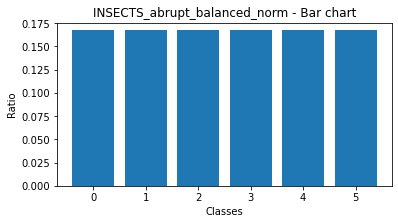

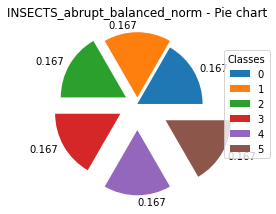

In [20]:
distribution_plots(classes_dist.keys(),
                   classes_dist.values(),
                   DATASETS['INSECTS_abrupt_balanced_norm']['name'])

<strong>| Définition de la fonction <a href="#distribution_plots"> distribution_plots</a> |</strong>

In [21]:
# Meta informations
print('---')
dataset_meta = dict()


print('--- name..')
dataset_meta['name'] = DATASETS['INSECTS_abrupt_balanced_norm']['name']

print('--- desc..')
dataset_meta['desc'] = "jeu de données régissant des résultats de capteurs de mouvement de 6 types d'insecte captés dans un piège."

print('--- size..')
dataset_meta['size'] = Taille

print('--- varriables..')
dataset_meta['varriables'] = Variables

print('--- var-nbr..')
dataset_meta['var-nbr'] = len(Variables)

print('--- var-types..')
Variables_types = [str(type_var) for type_var in dataset_df.dtypes.tolist()]
Variables_types.pop() # remove class
dataset_meta['var-types'] = Variables_types

print('--- classes_dist..')
dataset_meta['classes'] = classes_dist

print('--- class-encode..')
if classes_correspondance != None : # Vérification s'il y a une correspondance à faire
    dataset_meta['class-encode'] = classes_correspondance

print('--- class-nbr..')
dataset_meta['class-nbr'] = len(classes_dist.keys())

print('--- concept-drift..')
dataset_meta['concept-drift'] = "brusque"


print('---')

---
--- name..
--- desc..
--- size..
--- varriables..
--- var-nbr..
--- var-types..
--- classes_dist..
--- class-encode..
--- class-nbr..
--- concept-drift..
---


In [22]:
# Save dataset
dataset_file = os.path.join(DATASETS['INSECTS_abrupt_balanced_norm']['pre-proc-dir'],
                            DATASETS['INSECTS_abrupt_balanced_norm']['name'] + '.csv')

dataset_df.to_csv(dataset_file, index=False)

In [23]:
# Save meta
meta_file_path = os.path.join(DATASETS['INSECTS_abrupt_balanced_norm']['pre-proc-dir'],
                              DATASETS['INSECTS_abrupt_balanced_norm']['name'] + '.meta')

with open(meta_file_path, 'w') as meta_file:
    json.dump(dataset_meta, meta_file)


## Vérification du processus
with open(meta_file_path, 'r') as meta_file:
    print("Informations ont été enregistrées avec succès !")

Informations ont été enregistrées avec succès !


<strong> --- <a href="#SOMMAIRE"> SOMMAIRE </a> --- </strong>

<h5 id="INSECTS_abrupt_imbalanced_norm">INSECTS_abrupt_imbalanced_norm</h5>

<h5 id="INSECTS_gradual_balanced_norm">INSECTS_gradual_balanced_norm</h5>

<h5 id="INSECTS_gradual_imbalanced_norm">INSECTS_gradual_imbalanced_norm</h5>

<h5 id="INSECTS_incremental_balanced_norm">INSECTS_incremental_balanced_norm</h5>

<h5 id="INSECTS_incremental_imbalanced_norm">INSECTS_incremental_imbalanced_norm</h5>

<h5 id="INSECTS_incremental_abrupt_balanced_norm">INSECTS_incremental_abrupt_balanced_norm</h5>

<h5 id="INSECTS_incremental_abrupt_imbalanced_norm">INSECTS_incremental_abrupt_imbalanced_norm</h5>

<h5 id="INSECTS_incremental_reoccurring_balanced_norm">INSECTS_incremental_reoccurring_balanced_norm</h5>

<h5 id="INSECTS_incremental_reoccurring_imbalanced_norm">INSECTS_incremental_reoccurring_imbalanced_norm</h5>

<h5 id="INSECTS_out_of_control_norm">INSECTS_out_of_control_norm</h5>

<hr>
<div style="display: flex;">
    <div style="margin: 10px;"><strong><a href="./I-Introduction.ipynb">précédent</a></strong></div>
    <div style="margin: 10px;"><strong><a href="">suivant</a></strong></div>
</div>